In [1]:
# Data Cleansing

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

cr_df = pd.read_json('./complete_data.json')

def convert_cost(cost_str):
    import difflib
    
    s = cost_str.lower()
    if s != '-' and s != 'tbd':
        s = re.sub('[a-zA-Z]','',s)
        s = s.replace(",","")
        indicator = '.'
        if indicator in s:
            cost = re.findall("\d+\.\d+", s)
        else:
            cost = re.findall("[0-9]+", s)
    else:
        cost = s
        
    if cost_str.endswith("M") or cost_str.endswith("m"):
        return float(cost[0]) * 1000000
 
    end = re.findall('[a-zA-Z]+'+r'on\b', cost_str)
    measures = {'billion':1000000000,'million':1000000,'m':1000000}
    if cost in ['tbd', '-'] or len(cost) == 0:
        return None
    elif len(end) > 0:
        num = cost[0]
        fixed_measure = difflib.get_close_matches(end[0].lower(), ['billion','million','m'])[0]
        return float(num) * measures[fixed_measure]
    else:
        num = ''.join(cost).replace(',','')
        return float(num)
    
def get_currency(cost):
    if cost in ["TBD", "Not Indicated"]:
        return cost
    
    import difflib
    cost = cost.lower()
    cost = re.sub('\d+[,.]*', '', cost)
    word = cost.split()[0]
    if word not in ['tbd','-','not']:
        if len(difflib.get_close_matches(word, ['us','$','php'])) != 0:
            curr = {'us':'USD','$':'USD','php':'PHP'}
            return curr[difflib.get_close_matches(word, ['us','$','php'])[0]]
        else:
            return None
    else:
        return None

def get_cost(data):
    currency = data['Currency']
    
    if currency in ["TBD", "Not Indicated"]:
        return currency
    
    numerical = data['Numerical Cost']
    
    if numerical == None or pd.isnull(numerical):
        return '-'
    
    if currency == 'USD':
        numerical *= 50.54  

    numerical = f"{numerical:,.2f}"
    return 'PHP ' + numerical
        
    
# Debugger
'''for i,s in enumerate(cr_df['Cost']):
    print(f'\nIndex {i}')
    try:
        convert_cost(s)
        get_currency(s)
    except:
        print(f'Error')'''

cr_df['Numerical Cost'] = cr_df['Cost'].apply(convert_cost)
cr_df['Currency'] = cr_df['Cost'].apply(get_currency)

cr_df['Cost (PHP)'] = cr_df[['Numerical Cost', 'Currency']].apply(get_cost, axis=1)

pd.set_option('display.max_rows', None)
display(cr_df)

,Project Title,Region,Sector,Status,Award,Implementing Agency,Cost,Numerical Cost,Currency,Cost (PHP)
0,PPP for School Infrastructure Project Phase II...,"REGION X - NORTHERN MINDANAO,CARAGA",Education,Under Construction,Awarded,Department of Education (DepEd),"Php 1,604.59 Million",1.604590e+09,PHP,"PHP 1,604,590,000.00"
1,PPP for School Infrastructure Project Phase I ...,REGION IV-A - CALABARZON,Education,Operational,Awarded,Department of Education (DepEd),"Php 7,604.90 Million",7.604900e+09,PHP,"PHP 7,604,900,000.00"
2,PPP for School Infrastructure Project Phase I ...,REGION III - CENTRAL LUZON,Education,Operational,Awarded,Department of Education (DepEd),"Php 5,229.90 Million",5.229900e+09,PHP,"PHP 5,229,900,000.00"
3,Tri-City Ferry System Project,REGION I - ILOCOS,"Transportation,Ferry",Projects under Development,None,Local Governments of Alaminos City and Dagupa...,TBD,NaN,TBD,TBD
4,Metro Manila Skyway (Stage 2),NATIONAL CAPITAL REGION,Road,Operational,Awarded,Philippine National Construction Corporation (...,TBD,NaN,TBD,TBD
5,San Pablo City Water District Septage Manageme...,REGION IV-A - CALABARZON,"Environmental,Sanitation",Projects under Procurement,None,San Pablo City Water District,"Php 110,817,774.31",1.108178e+08,PHP,"PHP 110,817,774.31"
6,MWSS Privatization Project (East),NATIONAL CAPITAL REGION,Water and Sanitation,Operational,Awarded,Metropolitan Waterworks and Sewerage System (M...,-,NaN,None,-
7,Joint Venture Agreement for the Development an...,NATIONAL CAPITAL REGION,Property Development,Unknown,Awarded,National Housing Authority,Php 6.128 Billion,6.128000e+09,PHP,"PHP 6,128,000,000.00"
8,Modernization of Cebu Carbon Market,REGION VII - CENTRAL VISAYAS,"Agriculture,Agriculture/Food Security",Under Pre-Construction,Awarded,City Government of Cebu,Php 5.5 Billion,5.500000e+09,PHP,"PHP 5,500,000,000.00"
9,Municipality of Malay Ecological Solid Waste M...,REGION VI - WESTERN VISAYAS,"Environmental,Solid Waste Management",Operational,Awarded,Municipal Government of Malay,-,NaN,None,-


In [2]:
total_costs=pd.DataFrame(cr_df['Numerical Cost'].sum(), index = ["Total Costs for all Projects"], columns=["Numerical Cost (Php)"])
total_costs['Numerical Cost (Php)']=total_costs['Numerical Cost (Php)'].astype('int64')
total_costs['Numerical Cost (Php)']=total_costs.apply(lambda x:"{:,}".format(x['Numerical Cost (Php)']), axis=1)
#
total_costs

,Numerical Cost (Php)
Total Costs for all Projects,"27,688,421,035,295"


In [3]:
#Data Analysis

category = list(set(cr_df['Status']))

table=[]
for i in category:
    table.append(pd.DataFrame(cr_df.loc[(cr_df['Status'] == i), 'Numerical Cost'].sum(), index = [i], 
                              columns=['Total Cost (PHP)']))

result1=table[0]
for i in range(1,len(table)):
    result1=result1.append(table[i])
    result1['Total Cost (PHP)']=result1['Total Cost (PHP)'].astype('int64')
    
final_table=result1.sort_values(by=['Total Cost (PHP)'], ascending=False)
final_table['Total Cost (PHP)']=final_table.apply(lambda x:"{:,}".format(x['Total Cost (PHP)']), axis=1)

styled_table=final_table.style.set_caption('Costs Under Project Status').set_table_styles([{
    'selector':'caption',
    'props':[
        ('color','black'),
        ('font-size','18px')
    ]
}])

display(styled_table)

,Total Cost (PHP)
Operational,"24,692,764,937,449"
For Approval of Relevant Government Bodies,"1,828,658,000,071"
Under Pre-Construction,"783,961,300,000"
Under Construction,"306,780,820,000"
Projects under Development,"31,429,350,000"
Unsolicited Projects Under Competitive Challenge,"22,100,000,000"
Completed/Concluded,"8,099,310,000"
Unsolicited Proposal Under Initial Evaluation by Implementing Agency,"7,448,500,000"
Unknown,"6,128,000,000"
Projects under Procurement,"1,050,817,774"


In [4]:
#Data Analysis
status = list(set(cr_df['Status']))

status_table=[]
for i in status:
    status_table.append(pd.DataFrame(cr_df.loc[(cr_df['Status'] == i), 'Numerical Cost'].mean(), index = [i], columns=["Average Cost (PHP)"]))

result=status_table[0]
for i in range(1,len(status_table)):
    result=result.append(status_table[i])
    result['Average Cost (PHP)']=result['Average Cost (PHP)'].astype('int64')
    
final_table=result.sort_values(by=['Average Cost (PHP)'], ascending=False)
final_table['Average Cost (PHP)']=final_table.apply(lambda x:"{:,}".format(x['Average Cost (PHP)']), axis=1)

styled_table=final_table.style.set_caption('Average Costs Under Project Status').set_table_styles([{
    'selector':'caption',
    'props':[
        ('color','black'),
        ('font-size','18px')
    ]
}])

display(styled_table)

,Average Cost (PHP)
Operational,"333,686,012,668"
For Approval of Relevant Government Bodies,"57,145,562,502"
Under Pre-Construction,"48,997,581,250"
Under Construction,"19,173,801,250"
Unsolicited Projects Under Competitive Challenge,"11,050,000,000"
Projects under Development,"7,857,337,500"
Unknown,"6,128,000,000"
Unsolicited Proposal Under Initial Evaluation by Implementing Agency,"1,241,416,666"
Completed/Concluded,"218,900,270"
Projects under Procurement,"210,163,554"


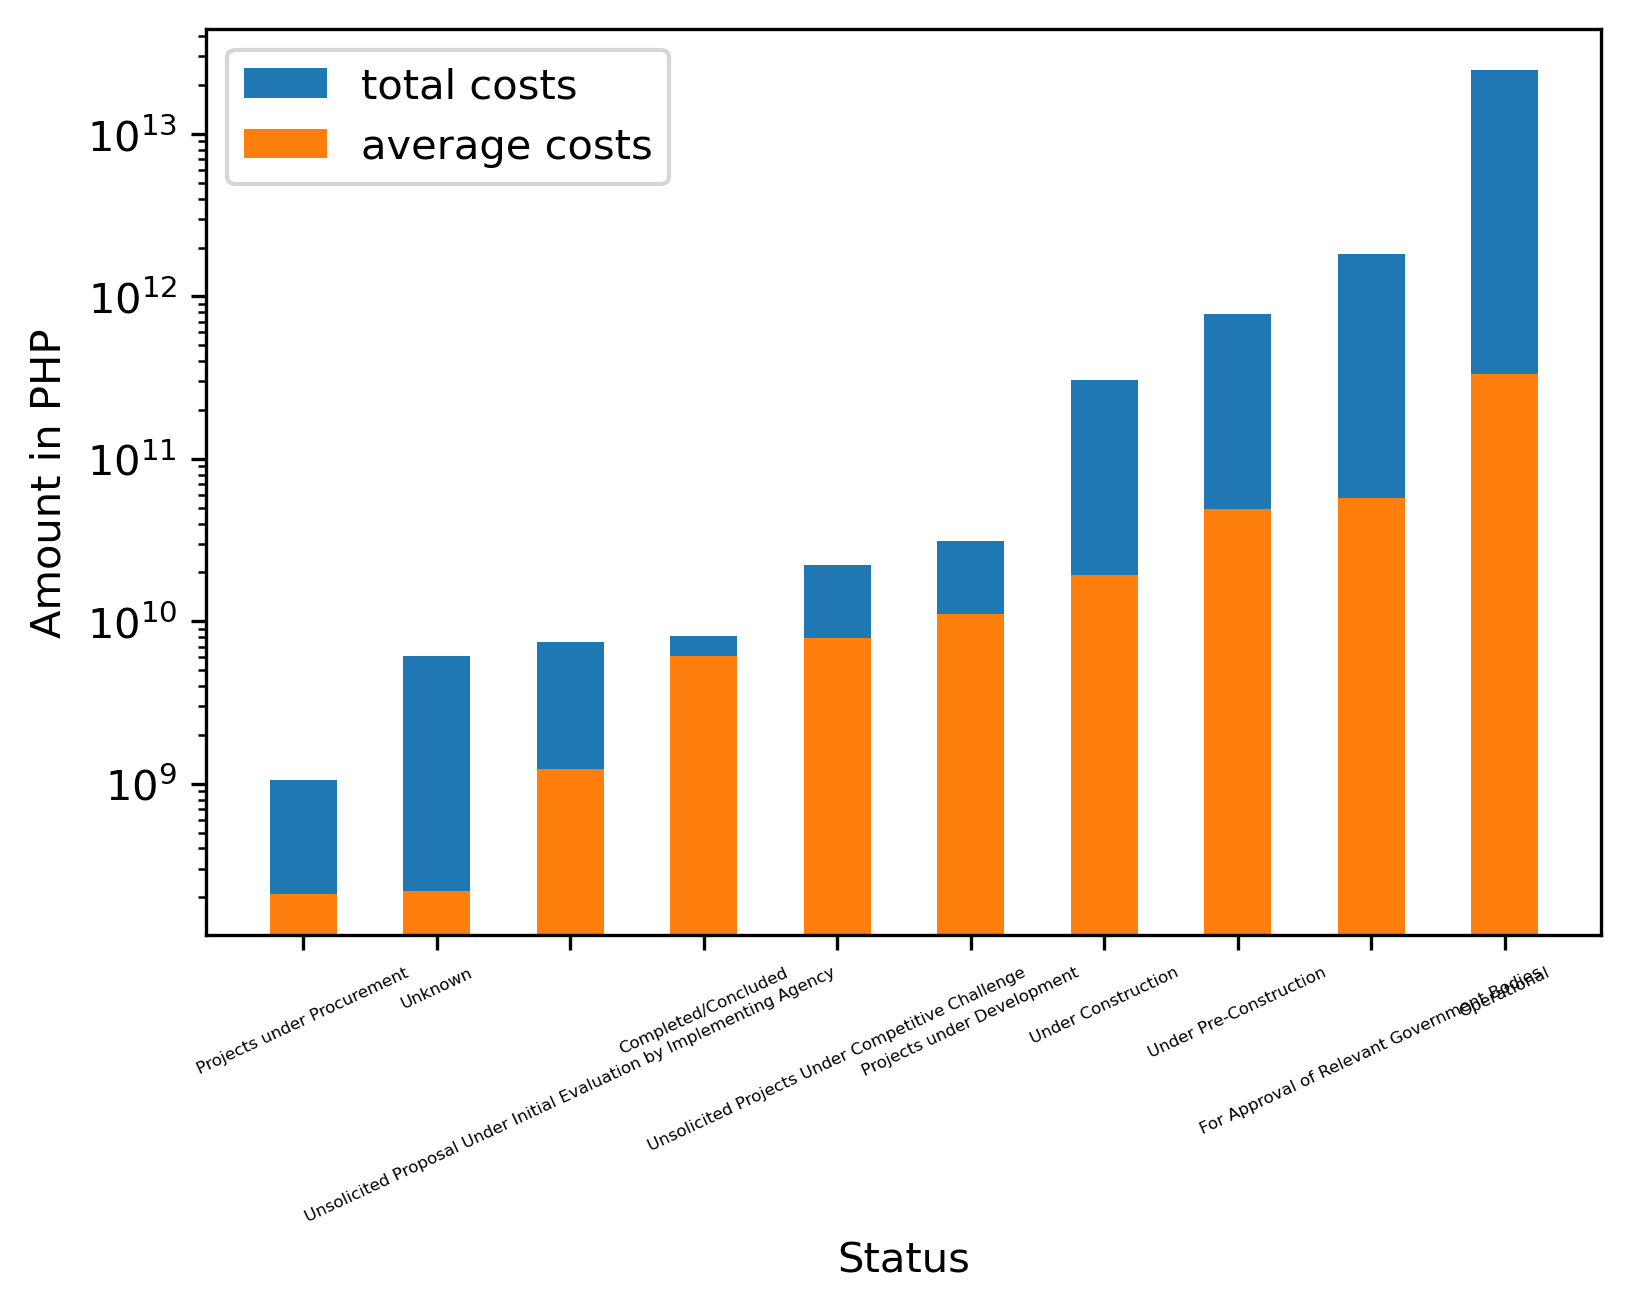

In [5]:
import matplotlib
import numpy as np

#Data Visualization

final_table=result1.sort_values(by=['Total Cost (PHP)'], ascending=True)
final_table1=result.sort_values(by=['Average Cost (PHP)'], ascending=True)

data=final_table.to_dict()['Total Cost (PHP)']
data1=final_table1.to_dict()['Average Cost (PHP)']
x=list(data.keys())
y=list(data.values())
z=list(data1.values())

w=0.5
plt.figure(dpi=300)
plt.bar(x,y,w,label="total costs")
plt.bar(x,z,w,label="average costs")

plt.xlabel("Status")
plt.ylabel("Amount in PHP")
plt.xticks(x, rotation=25, fontsize=4)
plt.yscale('log')
plt.legend()
plt.show()


In [6]:
#Data Analysis

sectors = list(set(cr_df['Sector']))

sectors_table=[]
for i in sectors:
    sectors_table.append(pd.DataFrame(cr_df.loc[(cr_df['Sector'] == i), 'Numerical Cost'].sum(), index = [i], columns=["Total Cost (PHP)"]))

result=sectors_table[0]
for i in range(1,len(sectors_table)):
    result=result.append(sectors_table[i])
    result['Total Cost (PHP)']=result['Total Cost (PHP)'].astype('int64')


final_table=result.sort_values(by=['Total Cost (PHP)'], ascending=False)
final_table['Total Cost (PHP)']=final_table.apply(lambda x:"{:,}".format(x['Total Cost (PHP)']), axis=1)


final_table=final_table.style.set_caption('Costs Under Sectors').set_table_styles([{
    'selector':'caption',
    'props':[
        ('color','black'),
        ('font-size','18px')
    ]
}])
    
display(final_table)

,Total Cost (PHP)
Road,"24,765,895,000,000"
"Transportation,Airport","1,037,876,000,045"
"Transportation,Rail","808,504,470,000"
"Land,Road","536,030,000,000"
Property Development,"209,337,070,025"
"Transportation,Port","99,036,000,000"
Water & Sanitation,"36,336,760,000"
"Environmental,Water,Water and Sanitation","31,347,487,449"
Solid Waste Management,"22,571,000,000"
Hospitals & Healthcare,"22,258,000,000"


In [7]:
#Data Analysis
sectors = list(set(cr_df['Sector']))

sectors_table=[]
for i in sectors:
    sectors_table.append(pd.DataFrame(cr_df.loc[(cr_df['Status'] == 'Operational') & (cr_df['Sector'] == i), 
                                                'Numerical Cost'].sum(), index = [i], columns=["Total Cost (PHP)"]))

sumresult=sectors_table[0]
for i in range(1,len(sectors_table)):
    sumresult=sumresult.append(sectors_table[i])
    sumresult['Total Cost (PHP)']= sumresult['Total Cost (PHP)']
    sumresult['Total Cost (PHP)']=sumresult['Total Cost (PHP)'].astype('int64')
    
final_table=sumresult.sort_values(by=['Total Cost (PHP)'], ascending=False)
final_table['Total Cost (PHP)']=final_table.apply(lambda x:"{:,}".format(x['Total Cost (PHP)']), axis=1)


final_table=final_table.style.set_caption('Total Costs Under Operational Projects in Each Sectors').set_table_styles([{
    'selector':'caption',
    'props':[
        ('color','black'),
        ('font-size','18px')
    ]
}])
    
display(final_table)

,Total Cost (PHP)
Road,"24,544,655,000,000"
Water & Sanitation,"36,231,760,000"
"Environmental,Water,Water and Sanitation","28,193,797,449"
Education,"16,280,700,000"
Property Development,"16,178,540,000"
"Transportation,Airport","15,056,000,000"
Airport,"5,610,000,000"
Information Technology,"5,201,600,000"
Power,"5,037,000,000"
"Environmental,Water and Sanitation","4,967,230,000"


In [8]:
#Data Analysis
sectors = list(set(cr_df['Sector']))


cr_df['Numerical Cost']=cr_df['Numerical Cost'].replace({np.nan:0})
cr_df['Numerical Cost']=cr_df['Numerical Cost'].fillna(0)


sectors_table=[]
for i in sectors:
    sectors_table.append(pd.DataFrame(cr_df.loc[(cr_df['Status'] == 'Operational') & 
                                                (cr_df['Sector'] == i) & (cr_df['Numerical Cost']>0), 
                                                'Numerical Cost'].mean(), index = [i], 
                                                columns=["Average Cost (PHP)"]))

result=sectors_table[0]
for i in range(1,len(sectors_table)):
    result=result.append(sectors_table[i])
    result['Average Cost (PHP)']= result['Average Cost (PHP)'].fillna(0)
    result['Average Cost (PHP)']=result['Average Cost (PHP)'].round().astype(np.int64)
    
final_table=result.sort_values(by=['Average Cost (PHP)'], ascending=False)
final_table['Average Cost (PHP)']=final_table.apply(lambda x:"{:,}".format(x['Average Cost (PHP)']), axis=1)


final_table=final_table.style.set_caption('Average Costs Under Operational Projects in Each Sectors').set_table_styles([{
    'selector':'caption',
    'props':[
        ('color','black'),
        ('font-size','18px')
    ]
}])
    
display(final_table)

,Average Cost (PHP)
Road,"2,727,183,888,889"
"Transportation,Airport","7,528,000,000"
Airport,"5,610,000,000"
Education,"5,426,900,000"
Water & Sanitation,"5,175,965,714"
Property Development,"3,235,708,000"
"Environmental,Water,Solid Waste Management","2,986,300,000"
"Transportation,Transport Terminal","2,500,000,000"
"Environmental,Water and Sanitation","2,483,615,000"
"Water,Water and Sanitation","1,787,140,000"


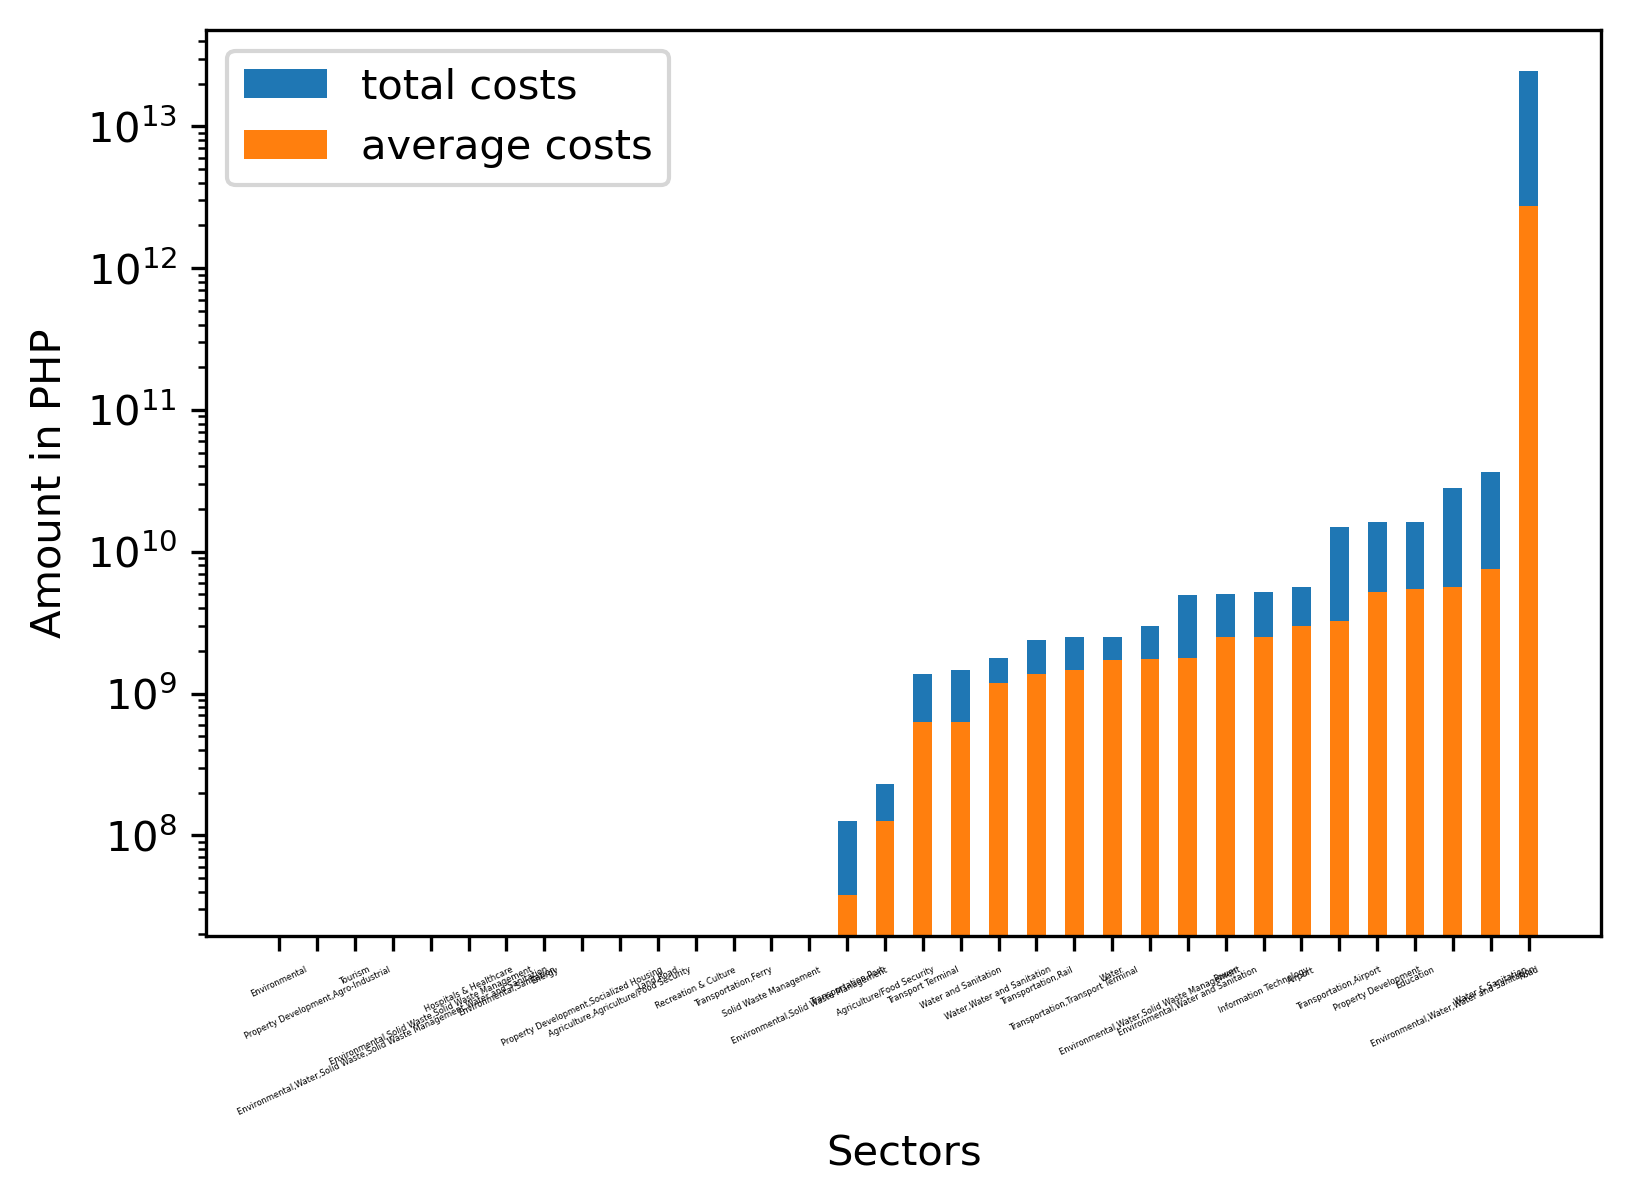

In [9]:
#Data Visualization
final_table=sumresult.sort_values(by=['Total Cost (PHP)'], ascending=True)
final_table1=result.sort_values(by=['Average Cost (PHP)'], ascending=True)

data=final_table.to_dict()['Total Cost (PHP)']
data1=final_table1.to_dict()['Average Cost (PHP)']
x=list(data.keys())
y=list(data.values())
z=list(data1.values())

w=0.5
plt.figure(dpi=300)
plt.bar(x,y,w,label="total costs")
plt.bar(x,z,w,label="average costs")

plt.xlabel("Sectors")
plt.ylabel("Amount in PHP")
plt.xticks(x, rotation=25, fontsize=2)
plt.yscale('log')
plt.legend()
plt.show()


In [10]:
#Data Analysis
sectors = list(set(cr_df['Sector']))

sectors_table=[]
for i in sectors:
    sectors_table.append(pd.DataFrame(cr_df.loc[(cr_df['Status'] == 'Completed/Concluded') & (cr_df['Sector'] == i), 
                                                'Numerical Cost'].sum(), index = [i], columns=["Total Cost (PHP)"]))

result=sectors_table[0]
for i in range(1,len(sectors_table)):
    result=result.append(sectors_table[i])
    result['Total Cost (PHP)']=result['Total Cost (PHP)'].astype('int64')
    
final_table=result.sort_values(by=['Total Cost (PHP)'], ascending=False)
final_table['Total Cost (PHP)']=final_table.apply(lambda x:"{:,}".format(x['Total Cost (PHP)']), axis=1)


final_table=final_table.style.set_caption('Costs Under Completed/Concluded Projects in Each Sectors').set_table_styles([{
    'selector':'caption',
    'props':[
        ('color','black'),
        ('font-size','18px')
    ]
}])
    
display(final_table)

,Total Cost (PHP)
Power,"4,377,360,000"
Information Technology,"3,506,000,000"
Property Development,"155,950,000"
Energy,"60,000,000"
"Property Development,Agro-Industrial",0
Hospitals & Healthcare,0
"Environmental,Solid Waste,Solid Waste Management",0
"Environmental,Water,Solid Waste,Solid Waste Management,Water and Sanitation",0
Water & Sanitation,0
"Environmental,Water,Water and Sanitation",0


In [11]:
#Data Analysis
regions = list(set(cr_df['Region']))

regions_table=[]
for i in regions:
    regions_table.append(pd.DataFrame(cr_df.loc[(cr_df['Region'] == i), 
                                                'Numerical Cost'].sum(), index = [i], columns=["Total Cost (PHP)"]))

result=regions_table[0]
for i in range(1,len(regions_table)):
    result=result.append(regions_table[i])
    result['Total Cost (PHP)']=result['Total Cost (PHP)'].astype('int64')
    
final_table=result.sort_values(by=['Total Cost (PHP)'], ascending=False)
final_table['Total Cost (PHP)']=final_table.apply(lambda x:"{:,}".format(x['Total Cost (PHP)']), axis=1)

final_table=final_table.style.set_caption('Costs Under Projects in Regions').set_table_styles([{
    'selector':'caption',
    'props':[
        ('color','black'),
        ('font-size','18px')
    ]
}])
    
display(final_table)

,Total Cost (PHP)
"REGION I - ILOCOS,REGION III - CENTRAL LUZON","24,415,190,000,000"
NATIONAL CAPITAL REGION,"1,230,676,660,025"
REGION III - CENTRAL LUZON,"886,006,793,711"
"REGION IV-A - CALABARZON,NATIONAL CAPITAL REGION","324,895,000,000"
,"204,840,000,000"
REGION IV-A - CALABARZON,"146,791,717,774"
REGION VII - CENTRAL VISAYAS,"133,984,400,000"
REGION XI - DAVAO,"113,744,110,000"
"REGION III - CENTRAL LUZON,NATIONAL CAPITAL REGION","100,564,470,000"
REGION VI - WESTERN VISAYAS,"50,674,300,000"


In [12]:
# Data Sorting

statuses = cr_df.Status.unique()

for status in statuses:
    df = cr_df.loc[cr_df["Status"] == status]
    sectors = df['Sector'].value_counts().index.tolist()

    new_df = pd.DataFrame(columns=list(df.columns))
    for sector in sectors:
        projects = df.loc[df["Sector"] == sector]
        projects = projects.sort_values('Numerical Cost', ascending=False)
        new_df = pd.concat([new_df, projects])
    
    final_df = new_df.filter(["Sector", "Project Title", "Implementing Agency", "Cost (PHP)", "Region", "Award"], axis=1)
    
    final_df = final_df.style.set_caption(status).set_table_styles([{
            'selector': 'caption',
            'props': [
                ('color', 'black'),
                ('font-size', '24px')
            ]
        }])
    final_df = final_df.hide_index()
    
    display(final_df)

Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Property Development,New Clark City – Mixed Use Industrial Real Estate Development,Bases Conversion and Development Authority,"PHP 308,600,000.00",REGION III - CENTRAL LUZON,Awarded
Property Development,Concession Agreement for the Cauayan City Entertainment and Cultural Center,Local Government of Cauayan City,"PHP 300,000,000.00",REGION II - CAGAYAN VALLEY,Awarded
Property Development,Cauayan City Entertainment and Cultural Center,Local Government of Cauayan City,"PHP 300,000,000.00",REGION II - CAGAYAN VALLEY,Awarded
Property Development,"Rehabilitation of Municipal Slaughterhouse, Operation and Maintenance of the Whole Kalibo Meat Plant",Local Government of Kalibo (Aklan),"PHP 30,000,000.00",REGION VI - WESTERN VISAYAS,Awarded
Property Development,Construction of 30 Units Commercial Stall,Local Government of Bayambang,"PHP 19,980,000.00",REGION I - ILOCOS,Awarded
Road,Metro Manila Skyway (MMS) Stage 3,Toll Regulatory BoardPhilippine National Construction Corporation (PNCC),"PHP 37,430,000,000.00",NATIONAL CAPITAL REGION,Awarded
Road,Southeast Metro Manila Expressway (SEMME) (C6 Expressway Phase 1),Philippine National Construction Corporation (PNCC) and Toll Regulatory Board,"PHP 35,500,000,000.00",NATIONAL CAPITAL REGION,Awarded
Road,Cavite-Laguna Expressway (CALAX),Department of Public Works and Highways (DPWH),"PHP 35,430,000,000.00",REGION IV-A - CALABARZON,Awarded
Road,Cebu-Cordova Toll Bridge Project (Cebu-Cordova Link Expressway),Local Governments of Cebu City and Municipality of Cordova,"PHP 27,900,000,000.00",REGION VII - CENTRAL VISAYAS,Awarded
Road,NLEx-SLEx Connector Road Project,Department of Public Works and Highways (DPWH),"PHP 23,200,000,000.00",NATIONAL CAPITAL REGION,Awarded


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement, Operation and Maintenance of the Water Supply and Septage Management Systems of Leyte Metropolitan Water District",Leyte Metropolitan Water District (LMWD),"PHP 6,143,740,000.00",REGION VIII - EASTERN VISAYAS,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement, Operation and Maintenance of the Water Supply of City of San Fernando Water District",City of San Fernando Water District (CSFWD),"PHP 2,955,970,000.00",REGION I - ILOCOS,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement, Operation and Maintenance of the Water Supply and Septage Management Systems of the Marilao Water District",Marilao Water District (MARWADIS),"PHP 2,918,460,000.00",REGION III - CENTRAL LUZON,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement, Operation and Maintenance of the Water Supply and Septage System of the Meycauayan Water District",Meycauayan Water District (MWD),"PHP 2,661,130,000.00",REGION III - CENTRAL LUZON,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement, Operation and Maintenance of the Water Supply and Septage System of the Lubao Water District",Lubao Water District (LWD),"PHP 2,343,340,000.00",REGION III - CENTRAL LUZON,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Improvement, Expansion, Operation and Maintenance of Water Supply System of San Carlos City, Pangasinan",San Carlos City Water District,"PHP 2,164,000,000.00",REGION I - ILOCOS,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Improvement, Expansion, Operation and Maintenance of the Water Supply System and Septage Facilities for Floridablanca Water District",Floridablanca Water District,"PHP 1,902,690,000.00",REGION III - CENTRAL LUZON,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement, Operation and Maintenance of the Water Supply System of the Guagua Water District",Guagua Water District,"PHP 1,554,740,000.00",REGION III - CENTRAL LUZON,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement, Operation and Maintenance of the Water Supply System and Construction and Management of the Septage Management Facilities of Paniqui Water District",Paniqui Water District,"PHP 1,457,000,000.00",REGION III - CENTRAL LUZON,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Development, Rehabilitation, Expansion, Improvement Operation and Maintenance of the Water Supply System and Septage System of the Gapan City Water District",Gapan City Water District,"PHP 1,366,880,000.00",REGION III - CENTRAL LUZON,Awarded


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Road,Central Luzon Link Expressway (CLLEX) Phase 1 O&M and Phase 2 Project,Department of Public Works and Highways (DPWH),"PHP 12,610,000,000.00",REGION III - CENTRAL LUZON,None
Road,Metro Cebu Expressway,Department of Public Works and Highways,TBD,REGION VII - CENTRAL VISAYAS,None
Road,"Improvement, Operation, and Maintenance of Kennon Road Project",Department of Public Works and Highways (DPWH),TBD,CAR REGION - CORDILLERA ADMINISTRATIVE REGION,None
Property Development,NEDA sa Makati Property Redevelopment Project,National Economic Development Authority,"PHP 1,280,000,000.00",NATIONAL CAPITAL REGION,None
Property Development,Rizal Park Western Section Development Project,Tourism Infrastructure and Enterprise Zone Authority (TIEZA),TBD,NATIONAL CAPITAL REGION,None
Hospitals & Healthcare,Bicol Medical Center’s Medical Arts Building and Upgrading of Health Services,Department of Health and Bicol Medical Center,TBD,REGION V - BICOL,None
Hospitals & Healthcare,Mariveles Mental Wellness Center,DOH and Mariveles Mental Wellness and General Hospital (MMWGH),TBD,REGION III - CENTRAL LUZON,None
Water & Sanitation,Bislig City Bulk Water Supply and Septage Project,Bislig City Water District,TBD,CARAGA,None
Water & Sanitation,Ormoc City Water Supply System Project,City Government of Ormoc,TBD,REGION VIII - EASTERN VISAYAS,None
Agriculture/Food Security,Iloilo City Slaughterhouse Project,City Government of Iloilo,"PHP 139,350,000.00",REGION VI - WESTERN VISAYAS,None


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Tourism,Development and Management of the Club Intramuros Golf Course,Tourism Infrastructure and Enterprise Zone Authority,"PHP 250,000,000.00",NATIONAL CAPITAL REGION,None
Tourism,Balicasag Island Dive Resort (BIDR) Project,Tourism Infrastructure and Enterprise Zone Authority (TIEZA),"PHP 110,000,000.00",REGION VII - CENTRAL VISAYAS,None
Information Technology,Road Transport Information Technology (IT) Infrastructure Project (Phase II),Department of Transportation (DOTr) and Land Transportation Franchising and Regulatory Board (LTFRB),"PHP 390,000,000.00",NATIONAL CAPITAL REGION,None
"Environmental,Sanitation",San Pablo City Water District Septage Management Program,San Pablo City Water District,"PHP 110,817,774.31",REGION IV-A - CALABARZON,None
Water,Baggao Level III Water Supply Project,Municipal Government of Baggao,"PHP 190,000,000.00",REGION II - CAGAYAN VALLEY,None


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Property Development,Joint Venture Agreement for the Development and Disposition of a Portion of the North Triangle Property (Vertis North),National Housing Authority,"PHP 6,128,000,000.00",NATIONAL CAPITAL REGION,Awarded


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Water,Joint-Venture Project on Water Distribution (JV2),Metro Iloilo Water District (MIWD),"PHP 12,350,000,000.00",REGION VI - WESTERN VISAYAS,Awarded
Water,"Expansion of Water Lines, Reservoir and Source Water Project",Dumaguete City Water District,"PHP 1,000,000,000.00",REGION VII - CENTRAL VISAYAS,Awarded
Water,City of Ilagan Water District Bulk Water Project,City of Ilagan Water District,"PHP 876,000,000.00",REGION II - CAGAYAN VALLEY,Awarded
"Environmental,Solid Waste Management",Joint-Venture Agreement for the Puerto Princesa City Waste to Energy Project,City Government of Puerto Princesa,"PHP 2,180,000,000.00",,Awarded
"Environmental,Solid Waste Management",Dagupan Waste-to-Energy Project,Local Government of Dagupan City,"PHP 551,000,000.00",REGION I - ILOCOS,Awarded
Water & Sanitation,Lumbo Spring Bulk Water Supply Project,San Pablo City Water District (SPCWD) and Dolores Water District (DWD),"PHP 105,000,000.00",REGION IV-A - CALABARZON,None
Water & Sanitation,Puerto Galera Sewerage and Wastewater Treatment Plant Project,Local Government of Puerto Galera (Mindoro Oriental),-,,Awarded
Property Development,Quezon City Central Post Office (QC-CPO),Philippine Postal Corporation,"PHP 9,138,000,000.00",NATIONAL CAPITAL REGION,Awarded
Property Development,Parañaque City Mixed-Used Development Project,Local Government of Parañaque City,"PHP 4,000,000,000.00",NATIONAL CAPITAL REGION,Awarded
"Environmental,Water,Water and Sanitation","Joint Venture Agreement for the Financing, Improvement, Rehabilitation, Expansion, Operation and Maintenance of the Water Supply and Septage Management Systems of Surigao Metropolitan Water District",Surigao Metropolitan Water District,"PHP 3,153,690,000.00",REGION XIII - CARAGA,Awarded


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Property Development,"Expansion, Operation and Maintenance of Vessel Traffic Services (VTS) in Seven Philippine Ports",Philippine Ports Authority,"PHP 1,448,000,000.00","REGION IV-A - CALABARZON,REGION IV-B - MIMAROPA,REGION VI - WESTERN VISAYAS,REGION X - NORTHERN MINDANAO,REGION XI - DAVAO,REGION XII - SOCCSKSARGEN,NATIONAL CAPITAL REGION",None
Property Development,Quezon City Footbridge Development Project,Quezon City Government,"PHP 70,000,000.00",NATIONAL CAPITAL REGION,None
"Transportation,Port","Development, Operations and Maintenance of General Santos Port",Philippine Ports Authority (PPA),"PHP 5,200,000,000.00",REGION XII - SOCCSKSARGEN,None
Information Technology,Davao No Contact Apprehension Project,Local Government of Davao,"PHP 49,500,000.00",REGION XI - DAVAO,None
Solid Waste Management,Zamboanga City Waste-to-Value Facility Project,City Government of Zamboanga,"PHP 571,000,000.00",REGION IX - ZAMBOANGA PENINSULA,None
"Environmental,Water and Sanitation",Tuguegarao City Septage Management Project,City Government of Tuguegarao,"PHP 110,000,000.00",REGION II - CAGAYAN VALLEY,None


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
"Transportation,Rail",MRT 7 Airport Access-North Line Project,Philippine National Railways (PNR),"PHP 130,900,000,000.00",NATIONAL CAPITAL REGION,None
"Transportation,Rail",C5 MRT 10 Project,Department of Transportation (DOTr),"PHP 112,260,000,000.00",NATIONAL CAPITAL REGION,None
"Transportation,Rail",MRT 7 Katipunan Spur Line Project,Philippine National Railways (PNR),"PHP 107,000,000,000.00","REGION IV-A - CALABARZON,NATIONAL CAPITAL REGION",None
"Transportation,Rail",MRT-11 Project,Department of Transportation,"PHP 81,790,000,000.00",NATIONAL CAPITAL REGION,None
"Transportation,Rail",Cebu Monorail Transit System Project,Department of Transporation (DOTr),"PHP 79,610,000,000.00",REGION VII - CENTRAL VISAYAS,None
"Transportation,Rail","Unsolicited Build-Transfer-Operate-Maintain (BTOM) Proposal for the Modified Light Rail Transit (LRT) 6, Phase 1",Department of Transporation (DOTr),"PHP 73,240,000,000.00",REGION IV-A - CALABARZON,None
"Transportation,Rail",East-West Rail Project,Philippine National Railways,"PHP 72,080,000,000.00",NATIONAL CAPITAL REGION,None
"Transportation,Rail",Fort Bonifacio – Makati Skytrain Project,Department of Transportation (DOTr),"PHP 3,910,000,000.00",NATIONAL CAPITAL REGION,None
"Transportation,Rail",Operations and Maintenance of the North-South Commuter Rail,Department of Transportation (DOTr),"PHP 3,220,000,000.00","REGION III - CENTRAL LUZON,REGION IV-A - CALABARZON,NATIONAL CAPITAL REGION",None
"Transportation,Rail",Metro Manila Subway Project (MMSP) Operations and Maintenance (O&M) PPP Project,Department of Transportation (DOTr),"PHP 2,660,000,000.00",NATIONAL CAPITAL REGION,None


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Environmental,General Santos City Sanitary Landfill Project,City Government of General Santos,"PHP 100,000,000.00",REGION XII - SOCCSKSARGEN,None
Solid Waste Management,Quezon City Integrated Solid Waste Management Facility Project,Quezon City Government,"PHP 22,000,000,000.00",NATIONAL CAPITAL REGION,None


Sector,Project Title,Implementing Agency,Cost (PHP),Region,Award
Power,Engineering Island Power Barge Project,National Power Corporation (NPC),"PHP 1,127,000,000.00",NATIONAL CAPITAL REGION,Awarded
Power,Leyte-Luzon (Malitbog) Geothermal Power Plant,Philippine National Oil Company – Energy Development Corporation (PNOC-EDC),"PHP 31,862,943,000.00",REGION VIII - EASTERN VISAYAS,Awarded
Power,Limay Bataan Combined Cycle Gas Turbine Power Plant (GTTP) Block B Project,National Power Corporation (NPC),"PHP 17,689,000,000.00",REGION III - CENTRAL LUZON,Awarded
Power,Leyte-Cebu Geothermal Power Plant,Philippine National Oil Company – Energy Development Corporation (PNOC-EDC),"PHP 15,441,486,200.00",REGION VIII - EASTERN VISAYAS,Awarded
Power,Limay Bataan Combine Cycle Gas Turbine Power Plant Block A Project,National Power Corporation (NPC),"PHP 15,060,920,000.00",REGION III - CENTRAL LUZON,Awarded
Power,Malaya Thermal Power Plant 1 & 2 Project,National Power Corporation (NPC),"PHP 12,635,000,000.00",REGION IV-A - CALABARZON,Awarded
Power,Bauang La Union Diesel Power Plant,National Power Corporation (NPC),"PHP 10,108,000,000.00",REGION I - ILOCOS,Awarded
Power,"Subic, Zambales Diesel Power Plant II Project",National Power Corporation (NPC),"PHP 6,064,800,000.00",REGION III - CENTRAL LUZON,Awarded
Power,"Bunker-Fired Diesel Generator Power Station Project (Pinamucan, Batangas Diesel Power Plant)",National Power Corporation (NPC),"PHP 6,064,800,000.00",REGION IV-A - CALABARZON,Awarded
Power,Navotas Diesel Power Barge 1 & 2,National Power Corporation (NPC),"PHP 5,559,400,000.00",NATIONAL CAPITAL REGION,Awarded
